
## Marketing Analytics 
#### Mao Kuang-Hsin

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and Merge Data
- Import two Excel sheets: `data_1` (sales performance) and `data_2` (product features)
- Merge, use `skuid` to create a unified dataset for analysis

In [21]:
file_path = "Marketing_Analytics_Intern_Assignment_1.xlsx"
data_1 = pd.read_excel(file_path, sheet_name="data_1")
data_2 = pd.read_excel(file_path, sheet_name="data_2")

### Compute Discount Rate and Conversion Rate
- Discount rate = `1 - (actual_sale_price / original_price)`
- Conversion rate = `daily_quantity_sold / product_views`

In [22]:
merged_df = pd.merge(data_1, data_2, on="skuid", how="left")
merged_df["discount_rate"] = 1 - merged_df["actual_sale_price"] / merged_df["original_price"]
merged_df["conversion_rate"] = merged_df["daily_quantity_sold"] / merged_df["product_views"]

### Visualization - Discount Rate vs. Conversion Rate
- Full Data Scatterplot, Same pattern observed, with a few extreme outliers.
- Outliers Removed Version for Comparison

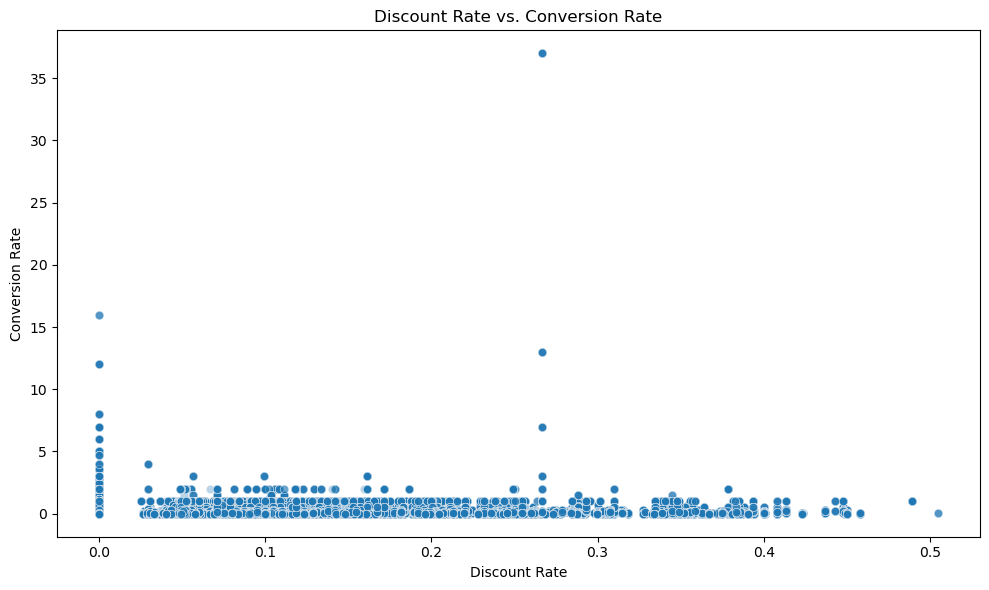

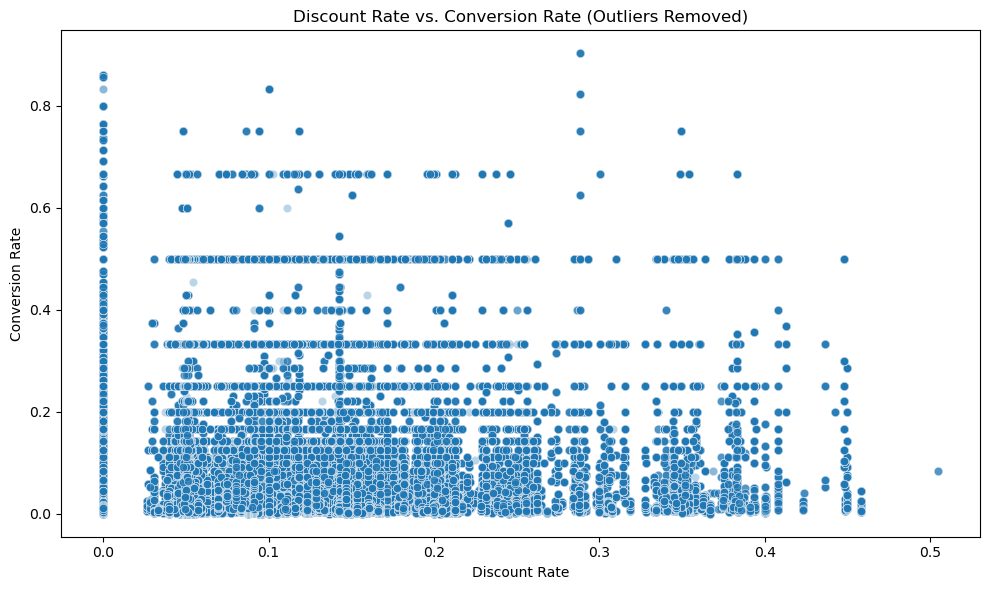

In [23]:
# ensure conversion_rate is numeric and clean data
merged_df["conversion_rate"] = pd.to_numeric(merged_df["conversion_rate"], errors="coerce")
merged_df = merged_df.dropna(subset=["conversion_rate"])

# Plot 1
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="discount_rate", y="conversion_rate", alpha=0.3)

plt.title("Discount Rate vs. Conversion Rate")
plt.xlabel("Discount Rate")
plt.ylabel("Conversion Rate")
plt.tight_layout()
plt.show()


# Remove extreme outliers in conversion_rate
filtered_df = merged_df[merged_df["conversion_rate"] < 1.0]  

# Plot 2, without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_df,
    x="discount_rate",
    y="conversion_rate",
    alpha=0.3
)
plt.title("Discount Rate vs. Conversion Rate (Outliers Removed)")
plt.xlabel("Discount Rate")
plt.ylabel("Conversion Rate")
plt.tight_layout()
plt.show()



### Binned Line Plot
#### Average Conversion Rate by Discount Range 
This chart shows the average conversion rate across discount bins.

- Slight upward trend as discount rate increases.
- Some spikes may be due to outliers with extremely high conversion rates.
- Results may be skewed by noisy or rare cases.

#### Average Conversion Rate by Discount Range (Outliers Removed)
Outliers (conversion_rate ≥ 1.0) were excluded for a cleaner trend.

- More consistent increase in conversion rate between 15% and 45% discount.
- Sudden drop at 45–50% may reflect low data volume or diminishing returns.
- Trend suggests higher discounts are generally linked to better conversions.


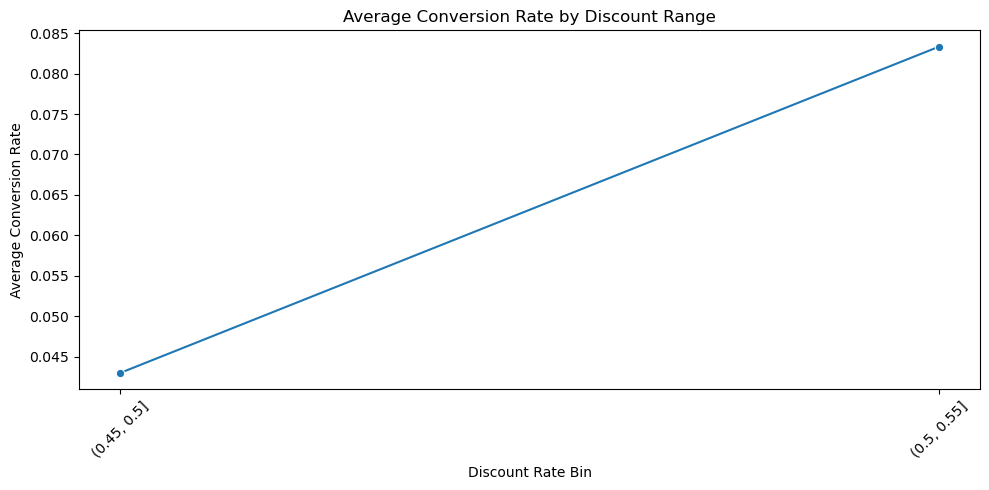

C:\Users\Cindy\AppData\Local\Temp\ipykernel_27200\1431231315.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["discount_bin"] = pd.cut(filtered_df["discount_rate"], bins=[i / 100 for i in range(0, 105, 5)])


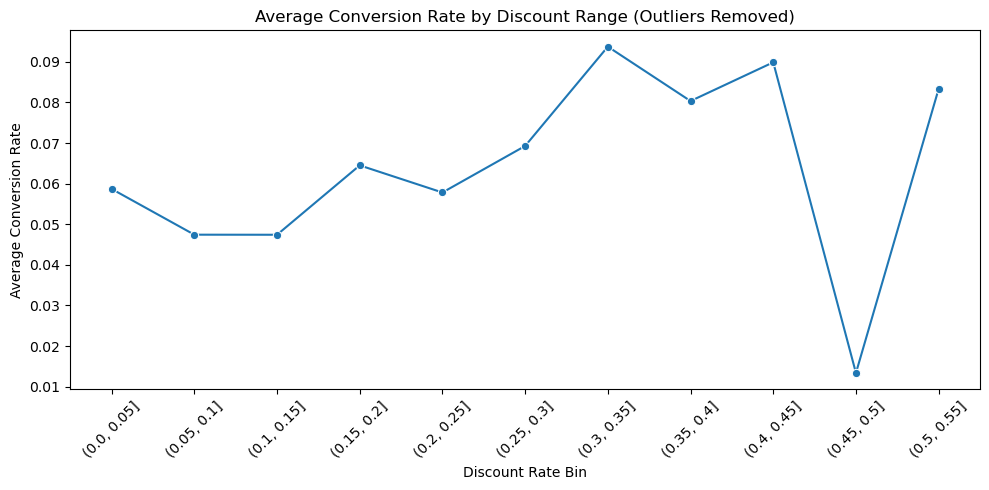

In [24]:
# Ensure conversion_rate is numeric and remove rows with missing values
merged_df["conversion_rate"] = pd.to_numeric(merged_df["conversion_rate"], errors="coerce")
merged_df = merged_df.dropna(subset=["conversion_rate"])

# Bin discount_rate into 5% intervals
merged_df["discount_bin"] = pd.cut(merged_df["discount_rate"], bins=[i / 100 for i in range(0, 105, 5)])

# Calculate mean conversion rate per bin
binned_all = (
    merged_df
    .groupby("discount_bin", observed=True)["conversion_rate"]
    .mean()
    .reset_index()
)
binned_all["discount_bin"] = binned_all["discount_bin"].astype(str)  # Convert bins to string for plotting

# Plot 1
plt.figure(figsize=(10, 5))
sns.lineplot(data=binned_all, x="discount_bin", y="conversion_rate", marker="o")
plt.title("Average Conversion Rate by Discount Range")
plt.xlabel("Discount Rate Bin")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter out extreme outliers
filtered_df = merged_df[merged_df["conversion_rate"] < 1]

# Re-bin and compute means
filtered_df["discount_bin"] = pd.cut(filtered_df["discount_rate"], bins=[i / 100 for i in range(0, 105, 5)])
binned_filtered = (
    filtered_df
    .groupby("discount_bin", observed=True)["conversion_rate"]
    .mean()
    .reset_index()
)
binned_filtered["discount_bin"] = binned_filtered["discount_bin"].astype(str)

# Plot 2, without outliers
plt.figure(figsize=(10, 5))
sns.lineplot(data=binned_filtered, x="discount_bin", y="conversion_rate", marker="o")
plt.title("Average Conversion Rate by Discount Range (Outliers Removed)")
plt.xlabel("Discount Rate Bin")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Category Analysis

- This scatter plot presents the relationship between **discount rate** and **conversion rate** across **all product categories**. 
- While most conversion rates are low, a few outliers exhibit extremely high values. Overall, the distribution appears dense around lower discount rates and lower conversion rates, it's a possible positive but weak correlation. 
#### Outlier Removal and Category Segmentation
- To improve the accuracy, removed extreme outliers with a conversion rate greater than 1.0. These points are likely due to very low view counts and distort the overall trend.

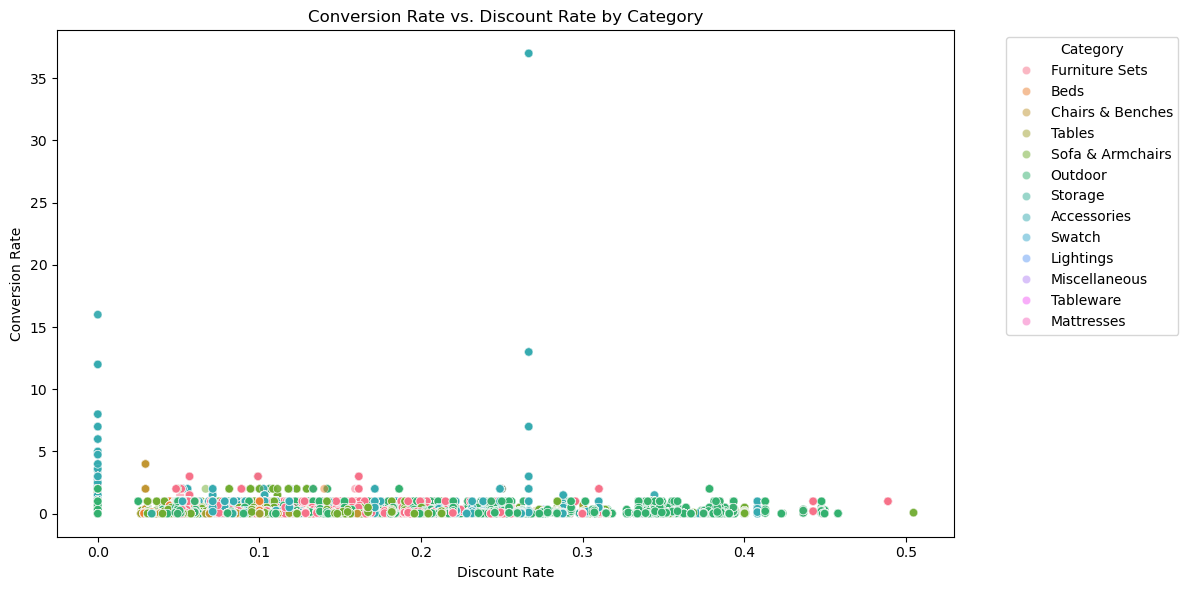

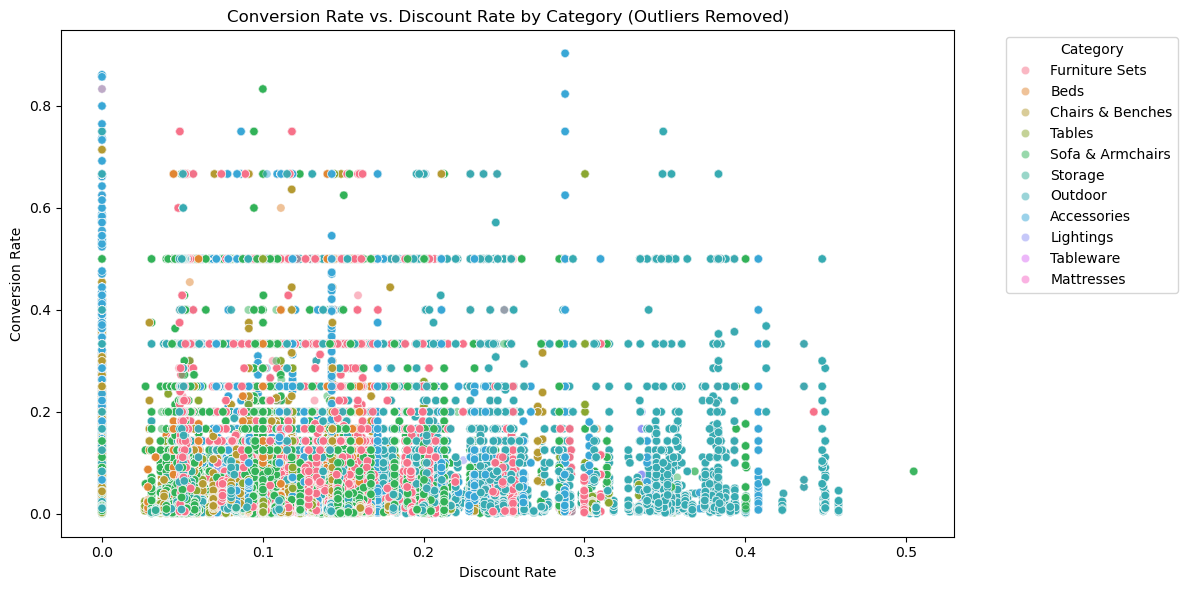

In [25]:
# Ensure conversion_rate is numeric and clean data
merged_df["conversion_rate"] = pd.to_numeric(merged_df["conversion_rate"], errors="coerce")
merged_df = merged_df.dropna(subset=["conversion_rate"])

# Plot 1
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=merged_df,  # Use full data here
    x="discount_rate",
    y="conversion_rate",
    hue="category",
    alpha=0.5,
    legend="full"
)

plt.title("Conversion Rate vs. Discount Rate by Category")
plt.xlabel("Discount Rate")
plt.ylabel("Conversion Rate")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Remove extreme outliers in conversion rate
merged_df = merged_df[merged_df["conversion_rate"] < 1.0]  # keep conversion rate < 1

#Plot 2, without outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=merged_df,
    x="discount_rate",
    y="conversion_rate",
    hue="category",
    alpha=0.5,
    legend="full"
)
plt.title("Conversion Rate vs. Discount Rate by Category (Outliers Removed)")
plt.xlabel("Discount Rate")
plt.ylabel("Conversion Rate")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
